# Project One: Climate Change - Earth Surface Temperature

In [1]:
#1. What’s the global average yearly temperature movements over the last 10 or 11 decades?
#a. Assumption: The global average yearly temperature has increased
#2. Is there a correlation between global population growth and temperature rise?
#3. If the temperature movements across the last 10 or 11 decades were different between the Northern and Southern hemisphere.
#4. Which are the top 10 countries that experienced the maximum average yearly temperature shifts?
#a. With the highest temperature rise and looking for any causes or any policies they have adopted.
#5. Which are the bottom 10 countries that had the least change in average yearly temperatures?
#6. Looking at Australia, what’re the changes in yearly temperature in the last 10 or 11 decades?
#7. Compare between Melbourne and Sydney, are there differences between the movements of average yearly temperature? 


In [2]:
# Import relevant dependencies

import pandas as pd
import gmaps
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import requests
import json
import scipy.stats as st
from pprint import pprint
import numpy as np
from config import g_api

## Data Cleanup



In [3]:
#Clean up the CSV

# Read CSV & format the date variable & remove na
global_temp = pd.read_csv('GlobalLandTemperaturesByCountry 4.csv',parse_dates=["dt"], index_col="dt")
global_temp.dropna(inplace=True)

# Preview the DataFrame
global_temp.head()



,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1744-04-01,1.530,4.680,Åland
1744-05-01,6.702,1.789,Åland
1744-06-01,11.609,1.577,Åland
1744-07-01,15.342,1.410,Åland


In [4]:
# Retrieve the Year from the "dt" variable for later groupby process
global_temp["Year"] = global_temp.index.year

# Preview DataFrame
global_temp.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
dt,,,,
1743-11-01,4.384,2.294,Åland,1743
1744-04-01,1.530,4.680,Åland,1744
1744-05-01,6.702,1.789,Åland,1744
1744-06-01,11.609,1.577,Åland,1744
1744-07-01,15.342,1.410,Åland,1744


In [5]:
#Clean up the CSV

# Read CSV & format the date variable & remove na
global_pop = pd.read_csv('population_total_long.csv')
global_pop.dropna(inplace=True)

# Preview the DataFrame
global_pop.head()

globalpopulation = global_pop.groupby("Year").agg({"Count":"sum"}).reset_index()
globalpopulation

,Year,Count
0,1960,3019770047
1,1961,3060517665
2,1962,3113194711
3,1963,3177998236
4,1964,3243186569
5,1965,3309774986
6,1966,3379482152
7,1967,3448841602
8,1968,3518946207
9,1969,3593195361


In [6]:
# Drop all data prior to 1913 & drop blanks

filtered_df = global_temp.loc[global_temp["Year"]>=1913]

filtered_df

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
dt,,,,
1913-01-01,-2.742,0.606,Åland,1913
1913-02-01,-0.599,0.359,Åland,1913
1913-03-01,0.925,0.276,Åland,1913
1913-04-01,3.138,0.458,Åland,1913
1913-05-01,7.319,0.486,Åland,1913
...,...,...,...,...
2013-04-01,21.142,0.495,Zimbabwe,2013
2013-05-01,19.059,1.022,Zimbabwe,2013
2013-06-01,17.613,0.473,Zimbabwe,2013


In [7]:
# Groupby Year to create the global average yearly temperature DataFrame (1st question)

global_yearly = filtered_df.groupby("Year").agg({"AverageTemperature":"mean"}).reset_index()

global_yearly

,Year,AverageTemperature
0,1913,18.491490
1,1914,18.660602
2,1915,18.711240
3,1916,18.551877
4,1917,18.242554
...,...,...
96,2009,19.546385
97,2010,19.629806
98,2011,19.456040
99,2012,19.468744


In [8]:
#mergeC

combinedglobal = pd.merge(global_yearly, globalpopulation, on = "Year", how="left")
combinedglobal.rename(columns={"Count":"World Population"}, inplace=True)
combinedglobal.dropna(inplace=True)
combinedglobal

,Year,AverageTemperature,World Population
47,1960,18.887013,3.019770e+09
48,1961,18.923565,3.060518e+09
49,1962,18.693847,3.113195e+09
50,1963,18.675248,3.177998e+09
51,1964,18.581275,3.243187e+09
52,1965,18.517541,3.309775e+09
53,1966,18.866288,3.379482e+09
54,1967,18.634187,3.448842e+09
55,1968,18.605819,3.518946e+09
56,1969,18.771526,3.593195e+09


In [9]:
# Groupby Year & Country and calculate the average yearly temperature for each country in each year
# This DataFrame will be used as the main DataFrame for resolving later questions

country_yearly = filtered_df.groupby(["Year","Country"]).agg({"AverageTemperature":"mean"}).reset_index()

country_yearly

,Year,Country,AverageTemperature
0,1913,Afghanistan,13.859250
1,1913,Africa,23.980583
2,1913,Albania,12.352167
3,1913,Algeria,23.079250
4,1913,American Samoa,26.115750
...,...,...,...
24367,2013,Western Sahara,23.744250
24368,2013,Yemen,28.129750
24369,2013,Zambia,21.196000
24370,2013,Zimbabwe,20.710750


In [10]:
listofcountries = country_yearly.groupby(["Country"]).agg({"AverageTemperature":"mean"}).reset_index()
listofcountries


,Country,AverageTemperature
0,Afghanistan,14.305178
1,Africa,24.314521
2,Albania,12.950989
3,Algeria,23.350174
4,American Samoa,26.791348
...,...,...
237,Western Sahara,22.653108
238,Yemen,26.392710
239,Zambia,21.458456
240,Zimbabwe,21.310406


## Analysis

### 1. What’s the global average yearly temperature movements over the last 10 or 11 decades?
       a. Assumption: The global average yearly temperature has increased


<AxesSubplot:xlabel='Year'>

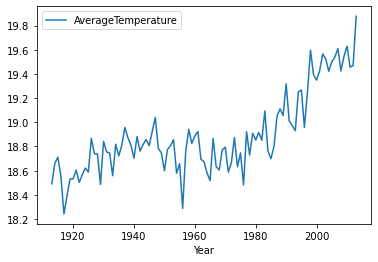

In [11]:
# Global average yearly temperature movements over the last 10 decades
global_yearly = filtered_df.groupby("Year").agg({"AverageTemperature":"mean"}).plot()

global_yearly

### 2. Is there a correlation between global population growth and temperature rise?


The correlation coefficient between World Population and Average Temperature is 0.9


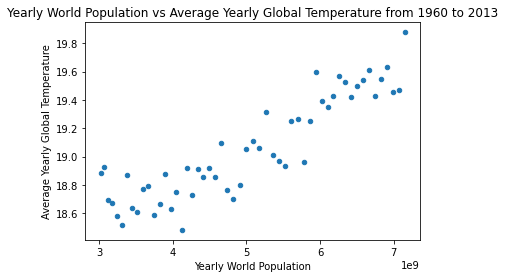

In [12]:
combinedglobal.dtypes
x_values = combinedglobal["World Population"]
y_values = combinedglobal.AverageTemperature
combinedglobal.plot.scatter(x="World Population", y="AverageTemperature")
plt.title("Yearly World Population vs Average Yearly Global Temperature from 1960 to 2013")
plt.xlabel("Yearly World Population")
plt.ylabel("Average Yearly Global Temperature")
print(f"The correlation coefficient between World Population and Average Temperature is {round(st.pearsonr(x_values,y_values)[0],2)}")

The r-squared is: 0.8046847597676358


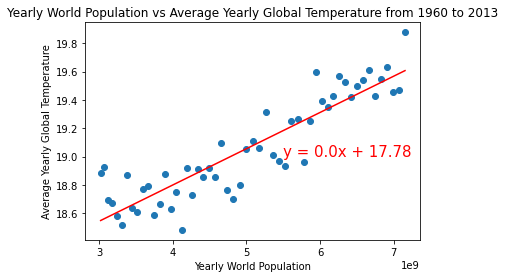

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5e+09,19),fontsize=15,color="red")
plt.title("Yearly World Population vs Average Yearly Global Temperature from 1960 to 2013")
plt.xlabel("Yearly World Population")
plt.ylabel("Average Yearly Global Temperature")
print(f"The r-squared is: {rvalue**2}")

### 3. If the temperature movements across the last 10 or 11 decades were different between the Northern and Southern hemisphere.



In [14]:
target_city = "Australia"

# Build the endpoint URL
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, g_api)
geo_data = requests.get(target_url).json()
pprint(geo_data)

{'results': [{'address_components': [{'long_name': 'Australia',
                                      'short_name': 'AU',
                                      'types': ['country', 'political']}],
              'formatted_address': 'Australia',
              'geometry': {'bounds': {'northeast': {'lat': -9.187026399999999,
                                                    'lng': 159.2872223},
                                      'southwest': {'lat': -54.83376579999999,
                                                    'lng': 110.9510339}},
                           'location': {'lat': -25.274398, 'lng': 133.775136},
                           'location_type': 'APPROXIMATE',
                           'viewport': {'northeast': {'lat': -0.6911343999999999,
                                                      'lng': 166.7429167},
                                        'southwest': {'lat': -51.66332320000001,
                                                      'lng': 100.0911072}}

In [15]:
lat = geo_data["results"][0]["geometry"]["location"]["lat"]
lng = geo_data["results"][0]["geometry"]["location"]["lng"]

In [16]:
lat = []
lng = []


for index, row in listofcountries.iterrows():
    country = row["Country"]
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(country, g_api)
    geo_data = requests.get(target_url).json()
    
    try:
        lat.append(geo_data["results"][0]["geometry"]["location"]["lat"])
        lng.append(geo_data["results"][0]["geometry"]["location"]["lng"])
        print(f'Processing record for Country: {geo_data["results"][0]["address_components"][0]["long_name"]}')
        
    except:
        print("Missing field/result... skipping.")




Processing record for Country: Afghanistan
Processing record for Country: Africa
Processing record for Country: Albania
Processing record for Country: Algeria
Processing record for Country: American Samoa
Processing record for Country: Andorra
Processing record for Country: Angola
Processing record for Country: Anguilla
Processing record for Country: Antigua and Barbuda
Processing record for Country: Argentina
Processing record for Country: Armenia
Processing record for Country: Aruba
Processing record for Country: Asia
Processing record for Country: Australia
Processing record for Country: Austria
Processing record for Country: Azerbaijan
Processing record for Country: The Bahamas
Processing record for Country: Bahrain
Processing record for Country: Baker Island
Processing record for Country: Bangladesh
Processing record for Country: Barbados
Processing record for Country: Belarus
Processing record for Country: Belgium
Processing record for Country: Belize
Processing record for Countr

Processing record for Country: Slovakia
Processing record for Country: Slovenia
Processing record for Country: Solomon Islands
Processing record for Country: Somalia
Processing record for Country: South Africa
Processing record for Country: South America
Processing record for Country: South Georgia and the South Sandwich Islands
Processing record for Country: South Korea
Processing record for Country: Spain
Processing record for Country: Sri Lanka
Processing record for Country: Sudan
Processing record for Country: Suriname
Processing record for Country: Svalbard and Jan Mayen
Processing record for Country: Eswatini
Processing record for Country: Sweden
Processing record for Country: Switzerland
Processing record for Country: Syria
Processing record for Country: Taiwan
Processing record for Country: Tajikistan
Processing record for Country: Tanzania
Processing record for Country: Thailand
Processing record for Country: Timor-Leste
Processing record for Country: Togo
Processing record fo

In [17]:
listofcountries
listofcountries["Lat"] = lat
listofcountries["Lng"] = lng
listofcountries
northdf = listofcountries[(listofcountries.Lat >= 0)]
northdf
southdf = listofcountries[(listofcountries.Lat <= 0)]
northdf

,Country,AverageTemperature,Lat,Lng
0,Afghanistan,14.305178,33.939110,67.709953
2,Albania,12.950989,41.153332,20.168331
3,Algeria,23.350174,28.033886,1.659626
5,Andorra,11.533834,42.506285,1.521801
7,Anguilla,26.872776,18.220554,-63.068615
...,...,...,...,...
235,Vietnam,23.963107,14.058324,108.277199
236,Virgin Islands,26.596864,18.335765,-64.896335
237,Western Sahara,22.653108,24.215527,-12.885834
238,Yemen,26.392710,15.552727,48.516388


### 4. Which are the top 10 countries that experienced the maximum average yearly temperature shifts?
        a. With the highest temperature rise and looking for any causes or any policies they have adopted.

### 5. Which are the bottom 10 countries that had the least change in average yearly temperatures?


### 6. Looking at Australia, what’re the changes in yearly temperature in the last 10 or 11 decades?


In [18]:
# Find lat/lon for Australia

target_city = "Australia"

# Build the endpoint URL
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, g_api)
geo_data = requests.get(target_url).json()
pprint(geo_data)

{'results': [{'address_components': [{'long_name': 'Australia',
                                      'short_name': 'AU',
                                      'types': ['country', 'political']}],
              'formatted_address': 'Australia',
              'geometry': {'bounds': {'northeast': {'lat': -9.187026399999999,
                                                    'lng': 159.2872223},
                                      'southwest': {'lat': -54.83376579999999,
                                                    'lng': 110.9510339}},
                           'location': {'lat': -25.274398, 'lng': 133.775136},
                           'location_type': 'APPROXIMATE',
                           'viewport': {'northeast': {'lat': -0.6911343999999999,
                                                      'lng': 166.7429167},
                                        'southwest': {'lat': -51.66332320000001,
                                                      'lng': 100.0911072}}

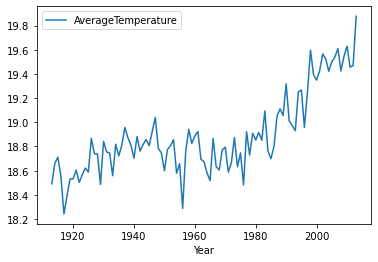

In [19]:
#Australia average yearly temperature movements over the last 10 decades

#Global average yearly temperature movements over the last 10 decades

country_yearly = filtered_df.groupby("Year").agg({"AverageTemperature":"mean"}).plot()





In [20]:
# Groupby Year & Country (Australia) and calculate the average yearly temperature in each year


country_yearly = 
Country = ["Australia"]
lat = []
temp = []

print (country)



SyntaxError: invalid syntax (<ipython-input-20-6b4703461d94>, line 4)

In [ ]:
australia_df = country_yearly.loc[country_yearly["Country"]=="Australia"]
australia_df

### 7. Compare between Melbourne and Sydney, are there differences between the movements of average yearly temperature? 



In [ ]:
# Find Lat/Lon for Melbourne and Sydney

cities = ["Sydney" , "Melbourne"]
response = requests.get (queryurl + city).json

In [ ]:
# Compare average yearly temperature 

lat.append (response)
temp.append (response)